# Predicting House Prices with Machine Learning

## A look into the data and data cleaning

First, let's understand our data and clean, if we need (certainly)

In [2]:
# Let's import all the libraries that we will need in this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
import sklearn.metrics as metrics

This data can be found here: https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

In [3]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [4]:
df.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

Great! We don't have null values o/

In [5]:
df.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


We have some red lights here:
1. Some variables that should be Boolean are not in the dataset: Elevator, Furnished, Swimming Pool and New.
2. Latitude and Longitude has weird values, that certainly are not in São Paulo - like 0. I thik we are not in the Equator or Prime Meridian.

Before checking and fixing the red lights that we saw, let's understand more about the variables that are not on the describe: 
- District	
- Negotiation Type	
- Property Type	

In [6]:
df['District'].value_counts()

Moema/São Paulo              293
Mooca/São Paulo              288
Brás/São Paulo               255
Brooklin/São Paulo           250
Bela Vista/São Paulo         250
                            ... 
Jardim São Luis/São Paulo     44
São Rafael/São Paulo          44
Grajaú/São Paulo              37
São Domingos/São Paulo        35
Perus/São Paulo               30
Name: District, Length: 96, dtype: int64

Looks right, but first, let's check if all the values are in São Paulo

In [7]:
len(df[df['District'].str.contains('São Paulo')])

13640

Right!!!

In [8]:
df['Negotiation Type'].value_counts()

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

So we have properties for sale and rent, they probably will need to be separeted forward.

In [9]:
df['Property Type'].value_counts()

apartment    13640
Name: Property Type, dtype: int64

Ok! Everything else seems right. So let's check our first red light --> the integer values that should be booleans!

In [10]:
df.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

Yes =(, they are wrong, all the other variables make sense.
Let's fix this o/

In [11]:
# Changing the variables (Elevator, Furnished, Swimming Pool and New) classified as int to bool.
df['Elevator']= df['Elevator'].astype(bool)
df['Furnished']= df['Furnished'].astype(bool)
df['Swimming Pool']= df['Swimming Pool'].astype(bool)
df['New']= df['New'].astype(bool)

Let's check

In [12]:
df.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator               bool
Furnished              bool
Swimming Pool          bool
New                    bool
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

Nice! Number 1 is fixed, lets go to Number 2 now.

In [13]:
df['Latitude'].value_counts()

 0.000000     881
-23.505391     57
-23.604294     43
-26.922512     32
-23.714221     25
             ... 
-23.549950      1
-23.709521      1
-23.588046      1
-23.648277      1
-23.552082      1
Name: Latitude, Length: 8405, dtype: int64

In [14]:
df['Longitude'].value_counts()

 0.000000     881
-46.622783     57
-46.518325     43
-49.060707     32
-46.533612     26
             ... 
-46.640676      1
-46.397772      1
-46.538700      1
-46.621514      1
-46.562182      1
Name: Longitude, Length: 8451, dtype: int64

881 values that has 0 Latitude and Longitude, should be null. But let's plot to understando more about it.

<Figure size 720x720 with 0 Axes>

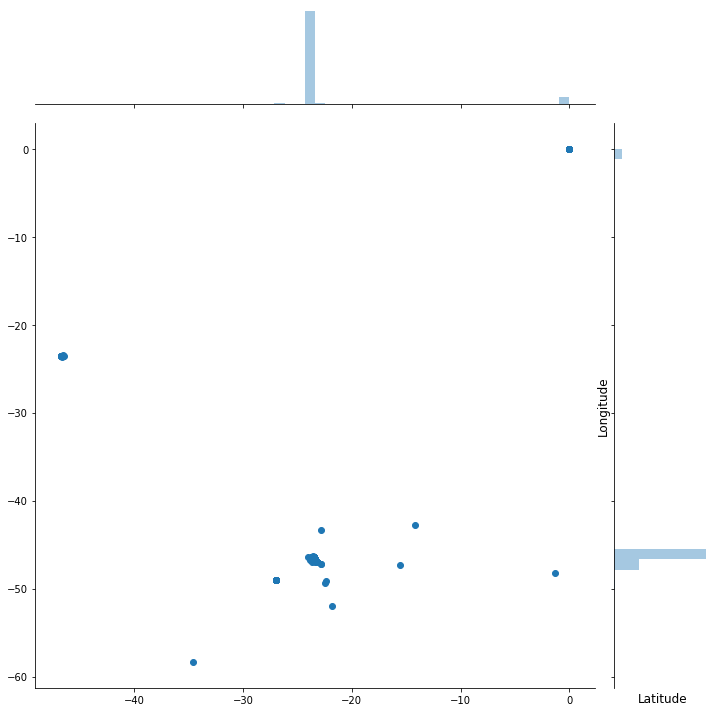

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [15]:
#Plotting a figure with our Latitude and Longitude values.
plt.figure(figsize=(10,10))
sns.jointplot(x=df['Latitude'].values, y=df['Longitude'].values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

This is very weird, don't make any sense that all of our values are located in São Paulo. Making a very quickly search I could understand some of the São Paulo's Latitude and Longitude limits.

In [16]:
#Checking how many Latitude and Longitude results are in São Paulo area.
df_saopaulo = df
df_saopaulo = df_saopaulo[df_saopaulo['Latitude'] > -23.851887 ]
df_saopaulo = df_saopaulo[df_saopaulo['Latitude'] < -23.389128 ]
df_saopaulo = df_saopaulo[df_saopaulo['Longitude'] < -46.369222 ]
df_saopaulo = df_saopaulo[df_saopaulo['Longitude'] > -46.789479 ]
df_saopaulo.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Latitude,Longitude
count,1.260600e+04,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000
mean,2.917262e+05,697.691179,84.992147,2.321672,2.109710,1.012058,1.408218,-23.562104,-46.626490
std,5.957324e+05,763.086340,58.410950,0.777236,0.959277,0.825235,0.829317,0.054057,0.084444
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,-23.773509,-46.789329
25%,1.900000e+03,295.000000,50.000000,2.000000,2.000000,1.000000,1.000000,-23.598324,-46.683409
50%,8.000000e+03,510.000000,65.000000,2.000000,2.000000,1.000000,1.000000,-23.555913,-46.642915
75%,3.700000e+05,850.000000,95.000000,3.000000,2.000000,1.000000,2.000000,-23.526339,-46.584821
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,-23.394787,-46.372909


Ok, we don't have so many wrong values. So, the next steps will be substitute them from Null values and after for the mean. 

In [17]:
#Substituting all the outside São Paulo values for NULL values
df['Latitude']= np.where(df['Latitude']< -23.851887, np.nan, df['Latitude'])
df['Latitude']= np.where(df['Latitude']> -23.389128, np.nan, df['Latitude'])
df['Longitude']= np.where(df['Longitude']> -46.369222, np.nan, df['Longitude'])
df['Longitude']= np.where(df['Longitude']< -46.789479, np.nan, df['Longitude'])

In [18]:
#Now let's fill them with the mean.
df['Longitude'].fillna((df['Longitude'].mean()), inplace=True)
df['Latitude'].fillna((df['Latitude'].mean()), inplace=True)

Now, I will plot again to check how the values are sorted.

<Figure size 720x720 with 0 Axes>

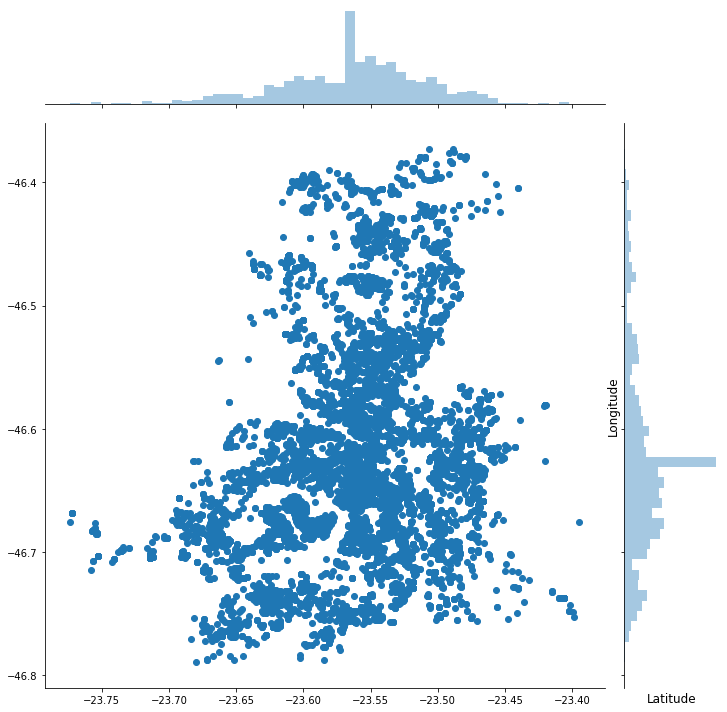

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [19]:
#Plotting a figure with our Latitude and Longitude values.
plt.figure(figsize=(10,10))
sns.jointplot(x=df['Latitude'].values, y=df['Longitude'].values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Great! Now we have a very different view, the values makes more sens for a city area.

## How we can get at least 90% accuracy to predict property prices?

Now that we have already cleaned the data, let's buid a model to predict the apartaments price! 

Since we have apartments for sale and rent, maybe will be better ho have 3 differents dataframes:
1. All the apartments
2. All the apartments for sales
3. All the apartments for rent

The first 1 we already have, so let's build the other 2.

In [20]:
# Separating the dataframe into 2 new ones - apartments for rent and for sale
df_rent = df[df['Negotiation Type'].str.match('rent')].drop(['Negotiation Type'], axis=1)
df_sale = df[df['Negotiation Type'].str.match('sale')].drop(['Negotiation Type'], axis=1)

Now, I will create a function to summy the categorical values and create X and y for our models.

In [21]:
def X_and_y(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function is to produce X and y:
    1. Create X as all the columns that are not the Price column
    3. Create y as the Price column
    4. Drop the Price column from X
    5. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    y = df['Price']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Price'], axis=1)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

Now let's use this function to create all the X and y for our 3 dataframes.

In [22]:
#Utiling the function X_and_y() to create our X and y for each dataframe.
X, y = X_and_y(df)
X_rent, y_rent = X_and_y(df_rent)
X_sale, y_sale = X_and_y(df_sale)

I will create the function to check if the Linear Regression Model can help us to predict the Prices.

In [23]:
def linear_regression_model(X, y):
    '''
    INPUT
    X - Dataframe column withou Price column - variables that will help to predict values.
    y - Dataframe Price column - values that we want to predict
    
    OUTPUT
    rsquared_score - how close the data are to the fitted regression line
    '''
    #Split X and y between train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

    #Linear Regression model and fit
    lm_model = linear_model.LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 

    #Rsquared and y_test
    rsquared_score = metrics.r2_score(y_test, y_test_preds)
    
    return rsquared_score

So, what are our R-squared score for each dataframe?

In [24]:
#R-squared score for all the apartments dataframe
linear_regression_model(X, y)

0.5010924120835694

In [25]:
#R-squared score for all the apartments for rent dataframe
linear_regression_model(X_rent, y_rent)

0.6968649473573372

In [26]:
#R-squared score for all the apartments for sale dataframe
linear_regression_model(X_sale, y_sale)

0.7336999244258264

Unfortunately our result were not good, we are far away from our objective: 90%. But we know that the rent and sales dataframes separeted works better. 

But before giving up on that model. Let's try to find if less features can help us.

In [27]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = linear_model.LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(metrics.r2_score(y_test, y_test_preds))
        r2_scores_train.append(metrics.r2_score(y_train, y_train_preds))
        results[str(cutoff)] = metrics.r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = linear_model.LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

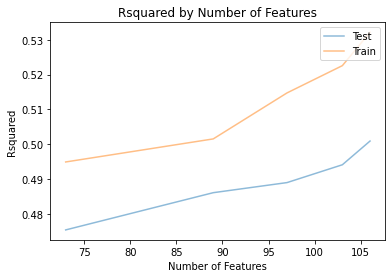

In [28]:
# First we input the cutoffs that we want to test, after we just call the function for each dataframe
cutoffs = [108, 80, 60, 40, 20, 10, 5]
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

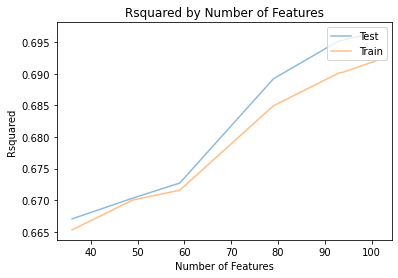

In [29]:
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X_rent, y_rent, cutoffs)

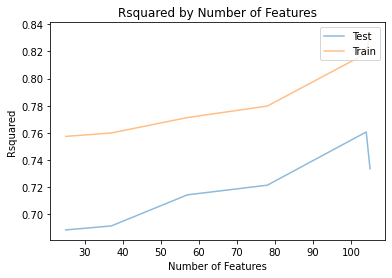

In [30]:
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X_sale, y_sale, cutoffs)

Having a different number of features will not help us. Will be better to use another model.

Searching for a better model, I founded the Gradiente Boosting Regressor! Let's try this:

In [31]:
def gradient_boosting(X, y):
    '''
    INPUT
    X - Dataframe column withou Price column - variables that will help to predict values.
    y - Dataframe Price column - values that we want to predict
    
    OUTPUT
    clf_score - the coefficient of determination R^2 of the prediction.
    '''
    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
    
    #Predict and score the model
    clf = ensemble.GradientBoostingRegressor(n_estimators = 300, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
    clf.fit(X_train, y_train)
    #Clf Socre
    clf_score = clf.score(X_test,y_test)
    
    return clf_score

In [32]:
#Clf score for all the apartments dataframe
gradient_boosting(X, y)

0.9317179570040728

In [33]:
#Clf score for all the apartments for rent dataframe
gradient_boosting(X_rent, y_rent)

0.7820656089367877

In [34]:
#Clf score for all the apartments for sale dataframe
gradient_boosting(X_sale, y_sale)

0.9047929906199526

Wow!!! It's done, and this model worked better for the dataframe with all the aparments! More than 93% ACCURACY.

## What neighborhoods in São Paulo have the highest squared meter price? And the lowest?

For this part, I will duplicate the rend and sale dataframes, but including the Squared Meter Price as a new variable:

In [35]:
#Creating new rent dataframe, including the Squared Meter Price new column
df_new_rent = df_rent
df_new_rent['Squared Meter Price'] = df_new_rent.apply(lambda row: row['Price'] / row['Size'], axis=1)

In [36]:
#Creating new sale dataframe, including the Squared Meter Price new column
df_new_sale = df_sale
df_new_sale['Squared Meter Price'] = df_new_sale.apply(lambda row: row['Price'] / row['Size'], axis=1)

Now I need to calculate the mean for each Discrict(Neighborhood):

In [37]:
#Now, in a new dataframe, I will group the squared meter price by the district and calculathe the mean
df_rent_sqm = df_new_rent.groupby('District', as_index=False)['Squared Meter Price'].mean().sort_values(by=['Squared Meter Price'], ascending=False)
df_sale_sqm = df_new_sale.groupby('District', as_index=False)['Squared Meter Price'].mean().sort_values(by=['Squared Meter Price'], ascending=False)

Let's plot the 10 districts with the highest Squared Meter Price (first for rent, after for sale):

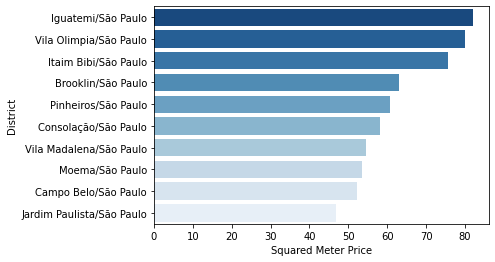

In [38]:
ax = sns.barplot(x='Squared Meter Price', y='District', data=df_rent_sqm.head(10), palette=sns.color_palette("Blues_r", 10))     

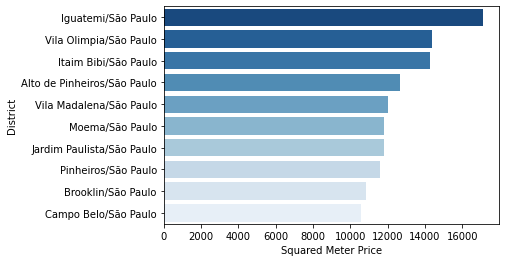

In [39]:
ax = sns.barplot(x='Squared Meter Price', y='District', data=df_sale_sqm.head(10), palette=sns.color_palette("Blues_r", 10))

Here we can already see the differences:
- We have 9 districts that are in both lists: Iguatemi, Vila Olimpia, Itaim Bibi, Brooklin, Pinheiros, Vila Madalena, Moema, Campo Belo and Jardim Paulista.
- Alto de Pinheiros is just in the 10 highest Squared Meter Price for sale.
- Consolação is just in the 10 highest Squared Meter Price for rent.

Now, I will plot the 10 districts with the lowest Squared Meter Price (first for rent, after for sale):

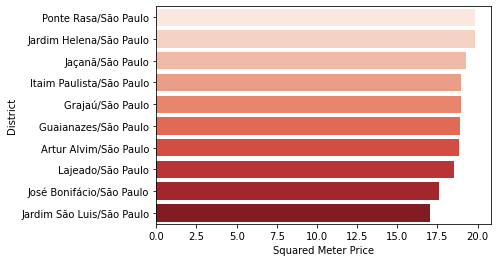

In [40]:
ax = sns.barplot(x='Squared Meter Price', y='District', data=df_rent_sqm.tail(10), palette=sns.color_palette("Reds", 10))

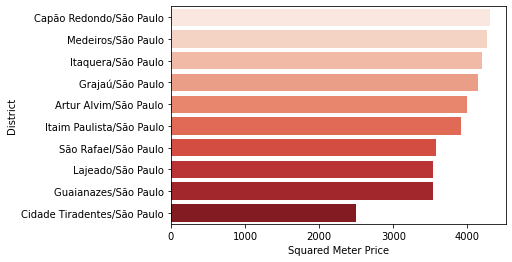

In [41]:
ax = sns.barplot(x='Squared Meter Price', y='District', data=df_sale_sqm.tail(10), palette=sns.color_palette("Reds", 10))

Let's understand this data:

- We have 5 districts that are in both lists: Grajaú, Artur Alvim, Itaim Paulista, Lajeado and Guaianazes.
- Capão Redondo, Medeiros, Itaquera, São Rafael and Cidade Tiradents are just in the 10 lowest Squared Meter Price for sale.
- Ponte Rasa, Jardim Helena, Jaçanã, José Bonifácio and Jardim São Luis are just in the 10 lowest Squared Meter Price for rent.

## Rent vs Sale: what is the difference between variables correlation with price?

Now let's see which variables impacts more in Price!
First I will plot a Heatmap indicating the variables correlation with price of all dataset:

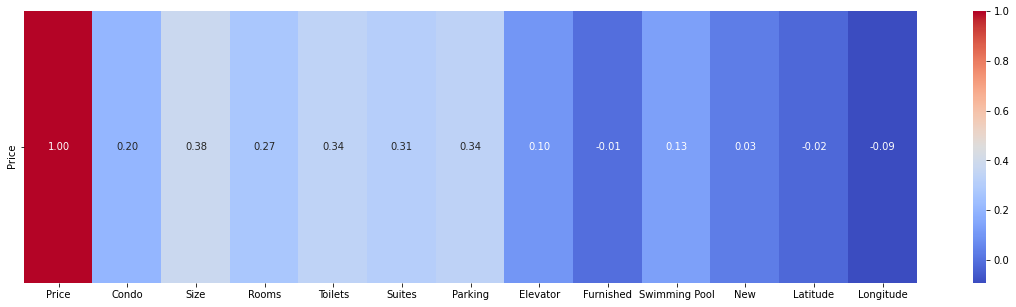

In [43]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr().loc[['Price'],:],cmap='coolwarm', annot=True, fmt=".2f");

This analysis don't show us so much, so I will separate this heatmap between Rent and Sales datasets.

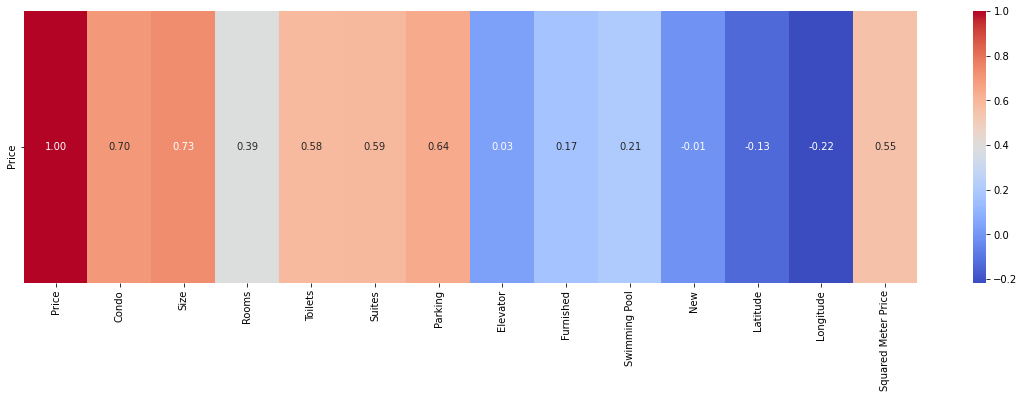

In [44]:
plt.figure(figsize=(20,5))
sns.heatmap(df_rent.corr().loc[['Price'],:],cmap='coolwarm', annot=True, fmt=".2f");

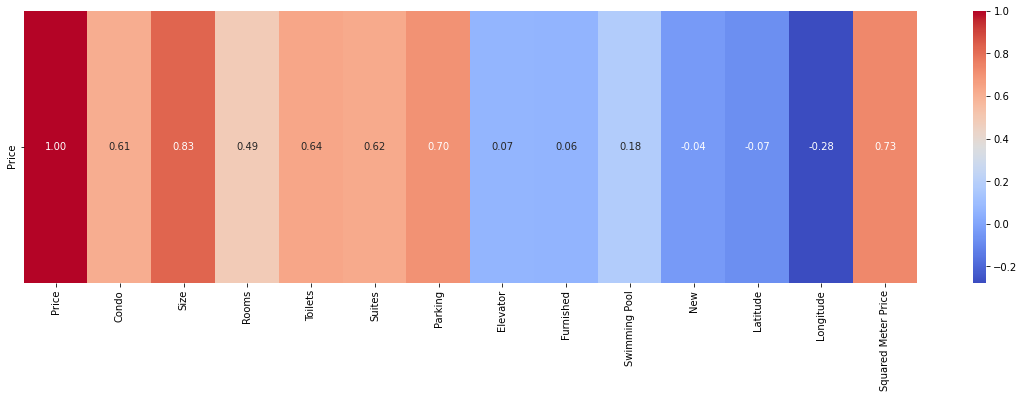

In [45]:
plt.figure(figsize=(20,5))
sns.heatmap(df_sale.corr().loc[['Price'],:],cmap='coolwarm', annot=True, fmt=".2f");

At those heatmap we can see some difference. 

Let's begin with variables that impacts more when the apartment is for sale:
- Size, number of rooms, toilets and parking spots.

And the variables that impacts more when the apartment is for rent:
- The condo price and if the apartment is furnished.

Bringing that to reality makes sense, because the variables with a bigger correlation in the sale dataset are more about long-term characteristics and in the rent dataset are more about short-term characteristics.

Another way to undestand that is to measure the coefficient weights in a Linear Regression model that we tried before:

In [47]:
def coef_weights(df):
    
    # Drop rows with missing salary values
    y = df['Price']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Price','District'], axis=1)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
    lm_model = linear_model.LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
    
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df



In [562]:
coef_weights(df_rent).head(20)

,est_int,coefs,abs_coefs
11,Longitude,1883.203287,1883.203287
10,Latitude,1016.841974,1016.841974
8,Swimming Pool,-398.852682,398.852682
9,New,-272.883072,272.883072
3,Toilets,234.883829,234.883829
5,Parking,232.767158,232.767158
2,Rooms,200.166586,200.166586
7,Furnished,-160.857741,160.857741
4,Suites,-138.376580,138.376580
12,Squared Meter Price,97.251337,97.251337


In [563]:
coef_weights(df_sale).head(20)

,est_int,coefs,abs_coefs
11,Longitude,676991.107025,676991.107025
10,Latitude,-154950.935715,154950.935715
4,Suites,95730.275565,95730.275565
8,Swimming Pool,-72137.878821,72137.878821
7,Furnished,-69741.144996,69741.144996
5,Parking,66141.099217,66141.099217
9,New,55063.540506,55063.540506
3,Toilets,-49586.048336,49586.048336
2,Rooms,-30378.333389,30378.333389
6,Elevator,-8834.772234,8834.772234


In this case, we can understand that Geographic Location is the more important charecteristic to define the price, what is very true. We can see this difference when we analysed the Districts with the higghest and lowest squared meter price.

- Suites and Furnished has bigger impact on price when we look to the sale dataframe.
- New and Toilets has bigger impact on price when we look to the rent dataframe.